In [1]:
import requests
import numpy as np

# Dehradun coordinates
lat, lon = 30.3165, 78.0322

# Open-Meteo API URL with hourly data for 10 features (example)
url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&hourly=temperature_2m,relative_humidity_2m,precipitation,cloudcover,weathercode,windspeed_10m,winddirection_10m,pressure_msl,dewpoint_2m,uv_index&timezone=Asia/Kolkata"

response = requests.get(url)
data = response.json()

# Extract hourly data for each feature
features = [
    'temperature_2m',
    'relative_humidity_2m',
    'precipitation',
    'cloudcover',
    'weathercode',
    'windspeed_10m',
    'winddirection_10m',
    'pressure_msl',
    'dewpoint_2m',
    'uv_index'
]

# Grab last 10 timesteps (you can adjust if needed)
timesteps = 10

weather_buffer = []
for i in range(timesteps):
    timestep_features = []
    for feature in features:
        # Sometimes data might be missing; fallback to 0 or interpolate if needed
        val = data['hourly'][feature][i] if i < len(data['hourly'][feature]) else 0
        timestep_features.append(val)
    weather_buffer.append(timestep_features)

weather_buffer = np.array(weather_buffer, dtype='float32')
print("Shape of weather_buffer:", weather_buffer.shape)  # should be (10, 10)

# Reshape for LSTM: (batch_size=1, timesteps=10, features=10)
input_for_lstm = weather_buffer.reshape(1, timesteps, len(features))

print("Input shape for LSTM:", input_for_lstm.shape)  # (1, 10, 10)


Shape of weather_buffer: (10, 10)
Input shape for LSTM: (1, 10, 10)


In [9]:
from keras.models import load_model

# Load your saved LSTM model (update path if needed)
lstm_model = load_model(r'D:/jupyter_nbk_project/disaster_relief_ai/notebooks/traffic_forecast_model.h5')

prediction = lstm_model.predict(input_for_lstm)
print("LSTM output:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
LSTM output: [[-1.0962166]]


In [15]:
import csv
from datetime import datetime

# Assuming lstm_model is loaded and input_for_lstm is your input array

prediction = lstm_model.predict(input_for_lstm)
lstm_output = float(prediction[0][0])
print("LSTM output:", lstm_output)

# Define status based on your model output — adjust logic if needed
if lstm_output > 0:  # or some threshold you define based on your data
    status = "High demand"
else:
    status = "Low demand"

# Function to log predictions with timestamp
def log_prediction(status, lstm_output, filename='prediction_log.csv'):
    with open(filename, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([datetime.now().isoformat(), status, lstm_output])

# Log the prediction
log_prediction(status, lstm_output)
print("Status:", status)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
LSTM output: -1.0962165594100952
Status: Low demand


In [19]:
from oauthlib.oauth2 import BackendApplicationClient
from requests_oauthlib import OAuth2Session

client_id = '3e9089c5-bc62-4575-a73d-6354f662565a'
client_secret = 'X8icP8YFm0T3EwCaZSiZz90yQEbkPTSX'

client = BackendApplicationClient(client_id=client_id)
oauth = OAuth2Session(client=client)
token = oauth.fetch_token(
    token_url='https://services.sentinel-hub.com/auth/realms/main/protocol/openid-connect/token',
    client_id=client_id,
    client_secret=client_secret
)

print("Access Token:", token['access_token'])


Access Token: eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJ3dE9hV1o2aFJJeUowbGlsYXctcWd4NzlUdm1hX3ZKZlNuMW1WNm5HX0tVIn0.eyJleHAiOjE3NDc1MDM2MDUsImlhdCI6MTc0NzUwMDAwNSwianRpIjoiZDI4MWFjNDYtODRkOS00ODc5LWE0YzEtMGM4NGM2NjA2Y2U5IiwiaXNzIjoiaHR0cHM6Ly9zZXJ2aWNlcy5zZW50aW5lbC1odWIuY29tL2F1dGgvcmVhbG1zL21haW4iLCJhdWQiOiJodHRwczovL2FwaS5wbGFuZXQuY29tLyIsInN1YiI6IjQ3Y2U5NGMzLWI4ODYtNDk2MC1hMGQwLWViMmM0MDg3NTdjMiIsInR5cCI6IkJlYXJlciIsImF6cCI6IjNlOTA4OWM1LWJjNjItNDU3NS1hNzNkLTYzNTRmNjYyNTY1YSIsInNjb3BlIjoiZW1haWwgcHJvZmlsZSIsImNsaWVudEhvc3QiOiIxNTIuNTkuMTIyLjE1NCIsImVtYWlsX3ZlcmlmaWVkIjpmYWxzZSwicGxfcHJvamVjdCI6IjhjZmZlNzc0LTZhY2YtNDEwZS1hMGUwLWQzZmMzOGE1NDYxZSIsInByZWZlcnJlZF91c2VybmFtZSI6InNlcnZpY2UtYWNjb3VudC0zZTkwODljNS1iYzYyLTQ1NzUtYTczZC02MzU0ZjY2MjU2NWEiLCJjbGllbnRBZGRyZXNzIjoiMTUyLjU5LjEyMi4xNTQiLCJjbGllbnRfaWQiOiIzZTkwODljNS1iYzYyLTQ1NzUtYTczZC02MzU0ZjY2MjU2NWEiLCJhY2NvdW50IjoiOGNmZmU3NzQtNmFjZi00MTBlLWEwZTAtZDNmYzM4YTU0NjFlIiwicGxfd29ya3NwYWNlIjoiOTM0YTIwYzItYmJjZS00MDE4LThjNzQtMz

In [22]:
`

 Image saved as 'dehradun_satellite.jpg'


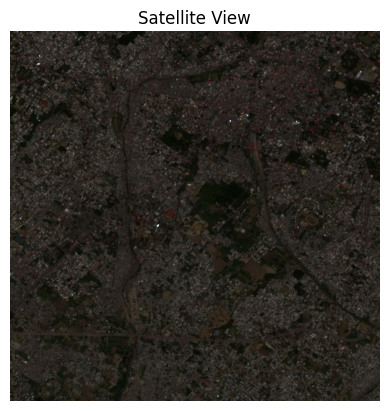

In [48]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("dehradun_satellite.jpg")
plt.imshow(img)
plt.axis('off')
plt.title("Satellite View")a
plt.show()


In [2]:
import folium
from folium.raster_layers import ImageOverlay

m = folium.Map(location=[30.30, 78.03], zoom_start=14)

# Add your satellite image as an overlay
ImageOverlay(
    name='Dehradun Satellite',
    image='dehradun_satellite.jpg',
    bounds=[[30.28, 78.00], [30.33, 78.05]],
    opacity=0.7
).add_to(m)

folium.LayerControl().add_to(m)
m.save("map_with_satellite.html")


In [3]:
import folium

m = folium.Map(location=[30.30, 78.03], zoom_start=14)
m  # Just put the map variable at the end to display it

In [10]:
from PIL import Image
import numpy as np

img = Image.open('dehradun_satellite.jpg').resize((64, 64))
img_array = np.array(img) / 255.0  # normalize if you did during training
img_array = img_array.reshape((1, 64, 64, 3))  # batch dimension

prediction = model.predict(img_array)
print("Prediction:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
Prediction: [[0.6258689]]


In [11]:
from tensorflow.keras.models import load_model

model = load_model(r'D:/jupyter_nbk_project/cnn_model.h5')
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,283 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [12]:
prediction = model.predict(img_array)
print("Prediction:", prediction)
print("Prediction:", "Not Blocked" if prediction[0][0] > 0.5 else "Blocked")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
Prediction: [[0.6258689]]
Prediction: Not Blocked


In [17]:
from oauthlib.oauth2 import BackendApplicationClient
from requests_oauthlib import OAuth2Session

client_id = '3e9089c5-bc62-4575-a73d-6354f662565a'
client_secret = 'X8icP8YFm0T3EwCaZSiZz90yQEbkPTSX'

client = BackendApplicationClient(client_id=client_id)
oauth = OAuth2Session(client=client)
token = oauth.fetch_token(
    token_url='https://services.sentinel-hub.com/auth/realms/main/protocol/openid-connect/token',
    client_id=client_id,
    client_secret=client_secret
)

print("Access Token:", token['access_token'])


Access Token: eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJ3dE9hV1o2aFJJeUowbGlsYXctcWd4NzlUdm1hX3ZKZlNuMW1WNm5HX0tVIn0.eyJleHAiOjE3NDc1NTk1ODMsImlhdCI6MTc0NzU1NTk4MywianRpIjoiOTUwMDgwOTctYzY3Mi00MWMyLThjNzYtODZlOGM5MTFhMmQzIiwiaXNzIjoiaHR0cHM6Ly9zZXJ2aWNlcy5zZW50aW5lbC1odWIuY29tL2F1dGgvcmVhbG1zL21haW4iLCJhdWQiOiJodHRwczovL2FwaS5wbGFuZXQuY29tLyIsInN1YiI6IjQ3Y2U5NGMzLWI4ODYtNDk2MC1hMGQwLWViMmM0MDg3NTdjMiIsInR5cCI6IkJlYXJlciIsImF6cCI6IjNlOTA4OWM1LWJjNjItNDU3NS1hNzNkLTYzNTRmNjYyNTY1YSIsInNjb3BlIjoiZW1haWwgcHJvZmlsZSIsImNsaWVudEhvc3QiOiIxNTIuNTkuMTIzLjcwIiwiZW1haWxfdmVyaWZpZWQiOmZhbHNlLCJwbF9wcm9qZWN0IjoiOGNmZmU3NzQtNmFjZi00MTBlLWEwZTAtZDNmYzM4YTU0NjFlIiwicHJlZmVycmVkX3VzZXJuYW1lIjoic2VydmljZS1hY2NvdW50LTNlOTA4OWM1LWJjNjItNDU3NS1hNzNkLTYzNTRmNjYyNTY1YSIsImNsaWVudEFkZHJlc3MiOiIxNTIuNTkuMTIzLjcwIiwiY2xpZW50X2lkIjoiM2U5MDg5YzUtYmM2Mi00NTc1LWE3M2QtNjM1NGY2NjI1NjVhIiwiYWNjb3VudCI6IjhjZmZlNzc0LTZhY2YtNDEwZS1hMGUwLWQzZmMzOGE1NDYxZSIsInBsX3dvcmtzcGFjZSI6IjkzNGEyMGMyLWJiY2UtNDAxOC04Yzc0LTMwZj

In [37]:
import requests
import os
import pandas as pd
import numpy as np
from keras.models import load_model
from io import BytesIO
from PIL import Image
from datetime import datetime

# === Load your trained models ===
cnn_model = load_model(r'D:/jupyter_nbk_project/cnn_model.h5')
lstm_model = load_model(r'D:/jupyter_nbk_project/disaster_relief_ai/notebooks/traffic_forecast_model.h5')

# === Uttarakhand locations ===
locations = ['Nainital', 'Dehradun', 'Rishikesh', 'Mussoorie', 'Rudraprayag']

# === Weather features for LSTM ===
weather_features = [
    'temperature_2m', 'relative_humidity_2m', 'precipitation',
    'cloudcover', 'weathercode', 'windspeed_10m',
    'winddirection_10m', 'pressure_msl', 'dewpoint_2m', 'uv_index'
]
timesteps = 10

# === Sentinel WMS Config ===
sentinel_wms_url = "https://services.sentinel-hub.com/ogc/wms/93855c93-c225-43d4-b7fb-4d03c1cdb017"
use_token = True  # Keep it True if your WMS needs auth
access_token = "eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJ3dE9hV1o2aFJJeUowbGlsYXctcWd4NzlUdm1hX3ZKZlNuMW1WNm5HX0tVIn0.eyJleHAiOjE3NDc1NTk1ODMsImlhdCI6MTc0NzU1NTk4MywianRpIjoiOTUwMDgwOTctYzY3Mi00MWMyLThjNzYtODZlOGM5MTFhMmQzIiwiaXNzIjoiaHR0cHM6Ly9zZXJ2aWNlcy5zZW50aW5lbC1odWIuY29tL2F1dGgvcmVhbG1zL21haW4iLCJhdWQiOiJodHRwczovL2FwaS5wbGFuZXQuY29tLyIsInN1YiI6IjQ3Y2U5NGMzLWI4ODYtNDk2MC1hMGQwLWViMmM0MDg3NTdjMiIsInR5cCI6IkJlYXJlciIsImF6cCI6IjNlOTA4OWM1LWJjNjItNDU3NS1hNzNkLTYzNTRmNjYyNTY1YSIsInNjb3BlIjoiZW1haWwgcHJvZmlsZSIsImNsaWVudEhvc3QiOiIxNTIuNTkuMTIzLjcwIiwiZW1haWxfdmVyaWZpZWQiOmZhbHNlLCJwbF9wcm9qZWN0IjoiOGNmZmU3NzQtNmFjZi00MTBlLWEwZTAtZDNmYzM4YTU0NjFlIiwicHJlZmVycmVkX3VzZXJuYW1lIjoic2VydmljZS1hY2NvdW50LTNlOTA4OWM1LWJjNjItNDU3NS1hNzNkLTYzNTRmNjYyNTY1YSIsImNsaWVudEFkZHJlc3MiOiIxNTIuNTkuMTIzLjcwIiwiY2xpZW50X2lkIjoiM2U5MDg5YzUtYmM2Mi00NTc1LWE3M2QtNjM1NGY2NjI1NjVhIiwiYWNjb3VudCI6IjhjZmZlNzc0LTZhY2YtNDEwZS1hMGUwLWQzZmMzOGE1NDYxZSIsInBsX3dvcmtzcGFjZSI6IjkzNGEyMGMyLWJiY2UtNDAxOC04Yzc0LTMwZjZmMmI5OWZhNSJ9.l_pX2067SrS5tXzjl_bcCbavH3eRrLmmoZcckR_PEuxqBxNEwR_0xo3PmCgcR5CgNexor0TvXugwP1ymcwS6dCW9mbSWtEFTDKXyMyCmU9glOrkdNHOTg279Do9trg5mU7LRqbfBOjMohHQH-I2pP51hfy1jjDmKirt3m417A_AQ_8oDq4EaHl6mYiquphuWtiLjujh4cWUN_3CHzrKGCHt23f8wNgnNMeoLGmv36N073PUH8XI79J4-Xy_czvqALVvew6zZULJtrVY0UDqTO3UmQRn9zZiOMbLRUQkHxUKBWZf0PviI3b3JlSC1Redl6b2nEx6BGQGNjmj0M169Qg"

# === Excel data container ===
data_records = []

# === Loop through locations ===
for loc in locations:
    # 1. Get coordinates from OpenCage API
    geo_url = f"https://api.opencagedata.com/geocode/v1/json?q={loc},Uttarakhand&key=9ddea0dbf0724ec085d2c372513d2cc4"
    geo_resp = requests.get(geo_url)
    geo_resp.raise_for_status()
    geo_data = geo_resp.json()
    lat = geo_data['results'][0]['geometry']['lat']
    lon = geo_data['results'][0]['geometry']['lng']

    # 2. Get weather data from Open-Meteo API
    weather_url = (
        f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}"
        f"&hourly={','.join(weather_features)}&timezone=Asia/Kolkata"
    )
    weather_resp = requests.get(weather_url)
    weather_resp.raise_for_status()
    weather_data = weather_resp.json()

    # === Prepare LSTM input with timesteps and features ===
    weather_buffer = []
    for i in range(timesteps):
        timestep_features = []
        for feature in weather_features:
            # Safety check if index exists, else 0
            val = weather_data['hourly'][feature][i] if i < len(weather_data['hourly'][feature]) else 0
            timestep_features.append(val)
        weather_buffer.append(timestep_features)
    weather_buffer = np.array(weather_buffer, dtype='float32')
    input_for_lstm = weather_buffer.reshape(1, timesteps, len(weather_features))

    # 3. Predict demand status using LSTM model
    lstm_prediction = lstm_model.predict(input_for_lstm)
    lstm_value = float(lstm_prediction[0][0])
    demand_status = "High demand" if lstm_value > 0 else "Low demand"

    # 4. Fetch Sentinel image from WMS for CNN input
    wms_params = {
        "REQUEST": "GetMap",
        "BBOX": f"{lon-0.05},{lat-0.05},{lon+0.05},{lat+0.05}",
        "LAYERS": "TRUE_COLOR",
        "MAXCC": "20",
        "WIDTH": "512",
        "HEIGHT": "512",
        "FORMAT": "image/jpeg",
        "CRS": "EPSG:4326",
        "TIME": "2023-05-01/2023-05-10"
    }

    headers = {"Authorization": f"Bearer {access_token}"} if use_token else {}
    img_response = requests.get(sentinel_wms_url, params=wms_params, headers=headers)
    image_save_dir = 'saved_images'
    os.makedirs(image_save_dir, exist_ok=True)

    if img_response.status_code == 200:
        # Open and resize the image
        img = Image.open(BytesIO(img_response.content)).resize((64, 64))
    
        # Generate filename with timestamp
        timestamp_str = datetime.now().strftime("%Y%m%d_%H%M%S")
        image_filename = f"{loc.replace(' ', '_')}_{timestamp_str}.jpg"
    
        # Save image
        img_path = os.path.join(image_save_dir, image_filename)
        img.save(img_path)
        print(f" Image saved at: {img_path}")
    
        # Preprocess image for CNN
        img_array = np.array(img) / 255.0  # normalize pixel values
        img_array = img_array.reshape((1, 64, 64, 3))  # shape: (1, 64, 64, 3)
    
        # Predict using CNN model
        cnn_prediction = cnn_model.predict(img_array)
    
        # Interpret prediction
        road_status = "Blocked" if cnn_prediction[0][0] > 0.5 else "Unblocked"
        cnn_confidence = float(cnn_prediction[0][0])

        print(f" Road Status: {road_status} (Confidence: {cnn_confidence:.2f})")
    else:
        print(f" Failed to fetch image for {loc}, status code: {img_response.status_code}")
        road_status = "Image Fetch Failed"
        cnn_confidence = 0.0

    # 6. Append all info into the data list
    data_records.append({
        "Timestamp": datetime.now().isoformat(),
        "Location": loc,
        "Latitude": lat,
        "Longitude": lon,
        "Temperature (C)": weather_data['hourly']['temperature_2m'][0],
        "Precipitation": weather_data['hourly']['precipitation'][0],
        "Road Status": road_status,
        "CNN Confidence": cnn_confidence,
        "Demand Status": demand_status,
        "LSTM Output": lstm_value
    })

# === Save results to Excel ===
df = pd.DataFrame(data_records)
df.to_excel("output_results.xlsx", index=False)
print(" Saved results to output_results.xlsx")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
 Image saved at: saved_images\Nainital_20250518_155126.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
 Road Status: Unblocked (Confidence: 0.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
 Image saved at: saved_images\Dehradun_20250518_155131.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
 Road Status: Unblocked (Confidence: 0.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
 Image saved at: saved_images\Rishikesh_20250518_155136.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
 Road Status: Unblocked (Confidence: 0.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
 Image saved at: saved_images\Mussoorie_20250518_155141.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
 Road Status: Unblocked (Confidence: 0.00)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
 Image saved at: saved_images\Rudraprayag_20250518_155146.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
 Road Status: Unblocked (Confidence: 0.00)
 Saved results to output_results.xlsx


In [30]:
df.to_excel("output_results.xlsx", index=False)


In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your data
df = pd.read_excel("output_results.xlsx")

# Normalize selected columns
scaler = MinMaxScaler()
df[['norm_conf', 'norm_demand', 'norm_temp']] = scaler.fit_transform(
    df[['CNN Confidence', 'LSTM Output', 'Temperature (C)']]
)

# Invert demand (because more negative = more demand)
df['norm_demand'] = 1 - df['norm_demand']

# Weights (feel free to adjust)
w_conf = 0.4
w_demand = 0.4
w_temp = 0.2

# Calculate risk score
df['Risk Score'] = (
    df['norm_conf'] * w_conf +
    df['norm_demand'] * w_demand +
    df['norm_temp'] * w_temp
)

# Rank based on risk
df['Rank'] = df['Risk Score'].rank(ascending=False)

# Sort and get top 3 risky zones
top_3 = df.sort_values(by='Risk Score', ascending=False).head(3)

# Save result to new Excel file
df.to_excel("output_with_risk_scores.xlsx", index=False)
top_3.to_excel("top_3_risk_zones.xlsx", index=False)

# Show top 3
print(top_3[['Location', 'Risk Score']])


      Location  Risk Score
1     Dehradun    0.914609
2    Rishikesh    0.628956
4  Rudraprayag    0.400000
